In [2]:
import pandas as pd

data = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2010-2011')
print(data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [4]:
print('Уникальных клиентов:', data['Customer ID'].nunique())
print('Уникальных товаров:', data['StockCode'].nunique())


Уникальных клиентов: 4372
Уникальных товаров: 4070


In [6]:
data = data.dropna(subset=['Customer ID'])
data.loc[:, 'InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])


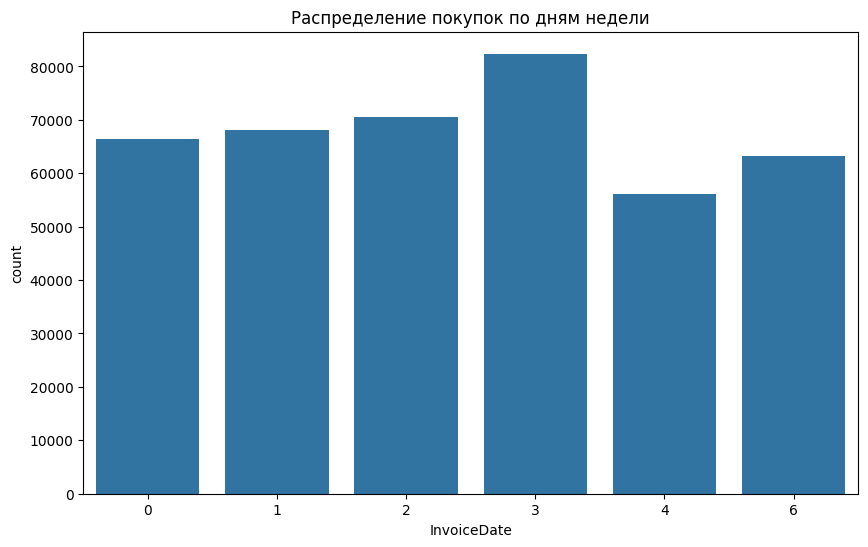

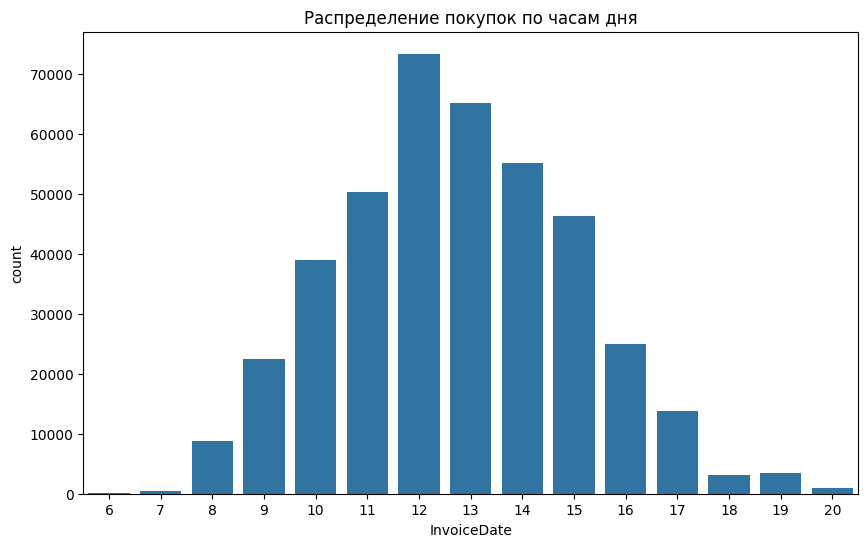

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x=data['InvoiceDate'].dt.dayofweek, data=data)
plt.title('Распределение покупок по дням недели')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x=data['InvoiceDate'].dt.hour, data=data)
plt.title('Распределение покупок по часам дня')
plt.show()


In [10]:
data['TotalPrice'] = data['Quantity'] * data['Price']
data['MeanPrice'] = data.groupby('Invoice')['Price'].transform('mean')
data['NumItems'] = data.groupby('Invoice')['Description'].transform('count')

features = ['TotalPrice', 'MeanPrice', 'NumItems',
            'InvoiceDate']


In [12]:
from sklearn.model_selection import train_test_split

X = data[features]
y = data['Customer ID']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Mean Squared Error: 4201.028777428238
R^2 Score: 0.34201783171187505
Mean Absolute Error: 15.721196788119803
Explained Variance Score: 0.3420185123879401
Cross-Validated Mean Squared Error: 74403.37515076535


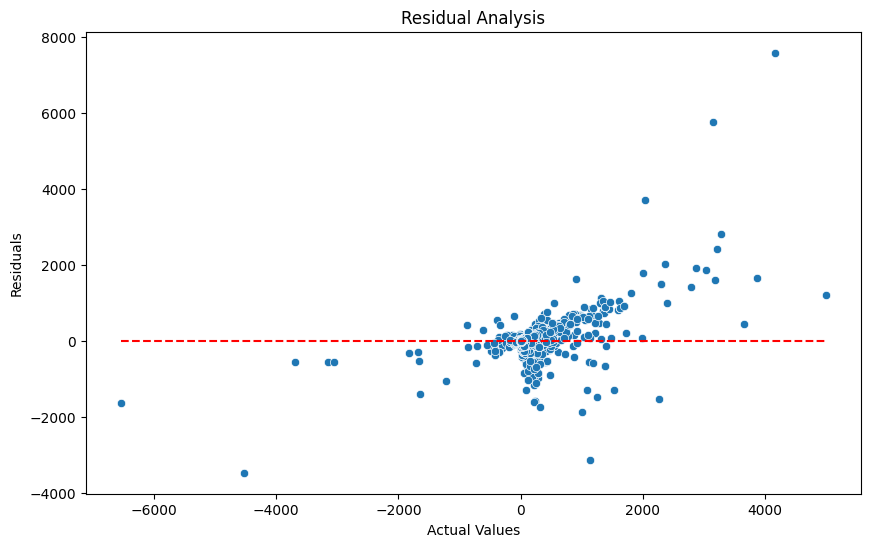

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score

df = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2010-2011')
# Data cleaning
df.dropna(subset=['Customer ID'], inplace=True)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalPrice'] = df['Quantity'] * df['Price']

# Feature selection and engineering
df['InvoiceYear'] = df['InvoiceDate'].dt.year
features = df[['Quantity', 'Price', 'InvoiceYear']]
target = df['TotalPrice']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Build and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Explained Variance Score: {evs}')

cv_scores = cross_val_score(model, features, target, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
print(f'Cross-Validated Mean Squared Error: {cv_mse}')


# Residual analysis
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Analysis")
plt.show()


Mean Squared Error: 546.8240737261264
R^2 Score: 0.9143541954209791
Mean Absolute Error: 0.35751739055650195
Explained Variance Score: 0.9143576787871316
Cross-Validated Mean Squared Error: 89132.82801791043


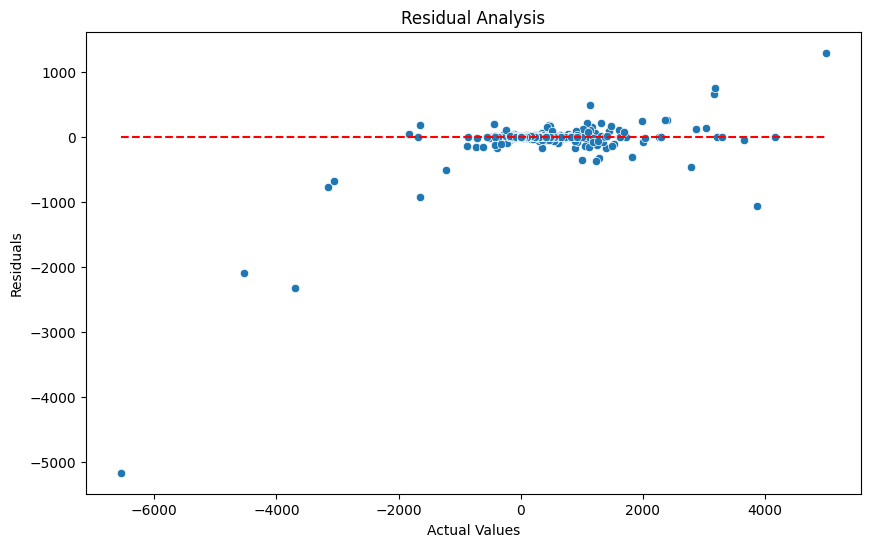

In [38]:
from sklearn.tree import DecisionTreeRegressor
# Data cleaning
df.dropna(subset=['Customer ID'], inplace=True)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalPrice'] = df['Quantity'] * df['Price']

# Feature selection and engineering
df['InvoiceYear'] = df['InvoiceDate'].dt.year
features = df[['Quantity', 'Price', 'InvoiceYear']]
target = df['TotalPrice']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Build and train the model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Explained Variance Score: {evs}')

cv_scores = cross_val_score(model, features, target, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
print(f'Cross-Validated Mean Squared Error: {cv_mse}')


# Residual analysis
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Analysis")
plt.show()

Mean Squared Error: 413.6555491104023
R^2 Score: 0.9352115899347164
Mean Absolute Error: 0.3067117953445991
Explained Variance Score: 0.9352131401340855
Cross-Validated Mean Squared Error: 74958.6241465129


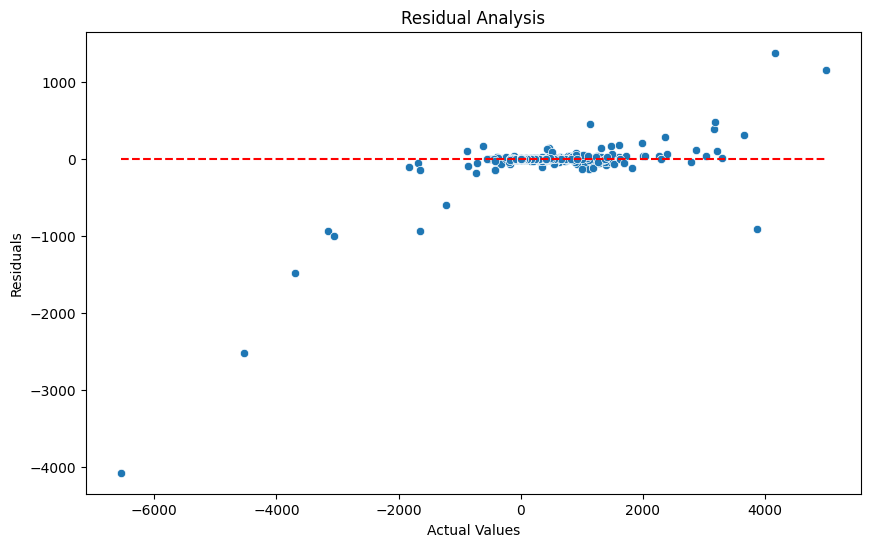

In [39]:
from sklearn.ensemble import RandomForestRegressor
df.dropna(subset=['Customer ID'], inplace=True)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalPrice'] = df['Quantity'] * df['Price']

# Feature selection and engineering
df['InvoiceYear'] = df['InvoiceDate'].dt.year
features = df[['Quantity', 'Price', 'InvoiceYear']]
target = df['TotalPrice']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Build and train the model
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Explained Variance Score: {evs}')

cv_scores = cross_val_score(model, features, target, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
print(f'Cross-Validated Mean Squared Error: {cv_mse}')


# Residual analysis
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Analysis")
plt.show()

Mean Squared Error: 598.6294500654884
R^2 Score: 0.9062402272339716
Mean Absolute Error: 4.708954332282121
Explained Variance Score: 0.9062414831050437
Cross-Validated Mean Squared Error: 89161.08656607356


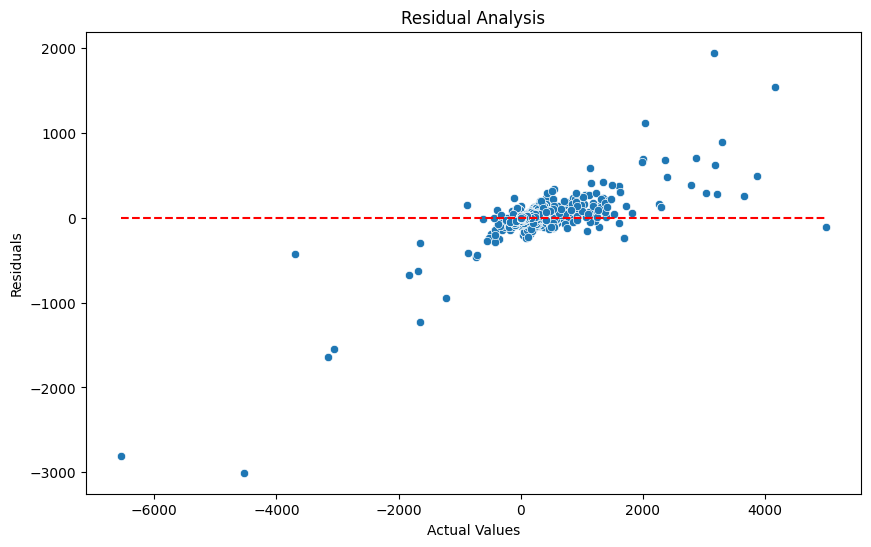

In [40]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
# Data cleaning
df.dropna(subset=['Customer ID'], inplace=True)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalPrice'] = df['Quantity'] * df['Price']

# Feature selection and engineering
df['InvoiceYear'] = df['InvoiceDate'].dt.year
features = df[['Quantity', 'Price', 'InvoiceYear']]
target = df['TotalPrice']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Build and train the model
model = GradientBoostingRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Explained Variance Score: {evs}')

cv_scores = cross_val_score(model, features, target, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
print(f'Cross-Validated Mean Squared Error: {cv_mse}')


# Residual analysis
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Analysis")
plt.show()